In [2]:
import datetime as dt
import matplotlib.pyplot as plt 
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [4]:
style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)
#pandas datareader read for the share tesla "TEsla" and returns the dataframee with important values
# his works because yahoo offers a finance api
df = web.DataReader('TSLA','yahoo',start,end)   # change company index to retireve for other companies

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


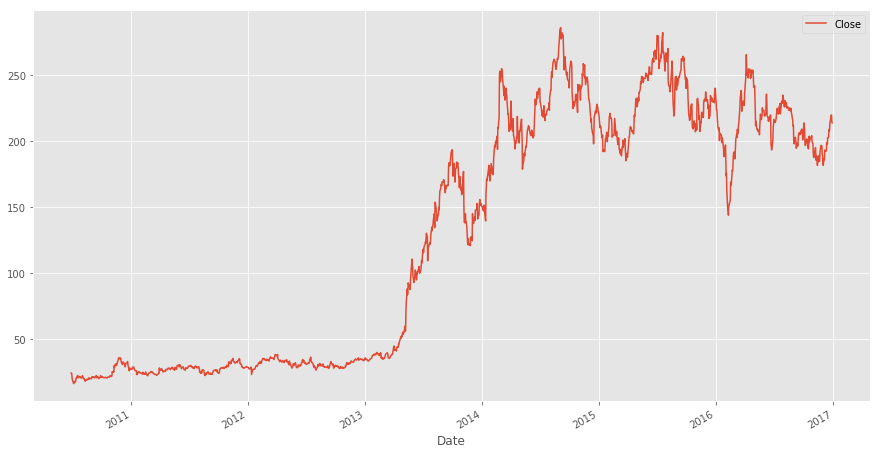

In [9]:
# plt.figure(figsize=(15,8))
df.plot(y='Close',figsize=(15,8)) # plot using df builtin plt handler
plt.show()

### Moving average
Lets plot a moving average for the close price for tesla stock:

In [10]:
#adding new col containing moving average:

df['MA'] = df['Adj Close'].rolling(window=100).mean()


In [11]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,MA
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,NaN
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,NaN
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,NaN
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,NaN
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,NaN


In [12]:
df.dropna(inplace=True)
# df.fillna(value=0)   # also can be used

In [13]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,MA
Date,,,,,,,
2010-11-17,30.750000,28.610001,30.200001,29.490000,750000,29.490000,20.9879
2010-11-18,30.740000,28.920000,30.670000,29.889999,956100,29.889999,21.0479
2010-11-19,31.370001,29.700001,30.160000,30.990000,1150500,30.990000,21.1195
2010-11-22,33.450001,31.500000,31.570000,33.400002,1529700,33.400002,21.2339
2010-11-23,35.680000,32.189999,33.290001,34.570000,1577800,34.570000,21.3876


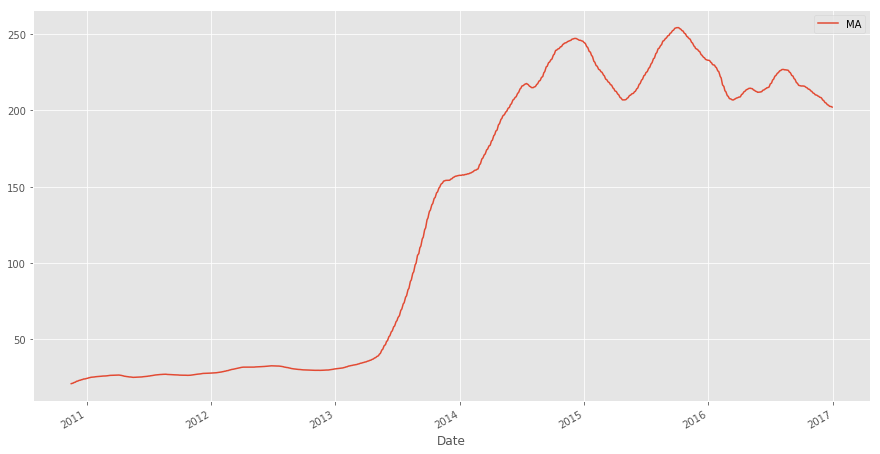

In [14]:
df.plot(y='MA',figsize=(15,8)) # plot using df builtin plt handler
plt.show()

In [15]:
# Plotting multiple grapsh in a single figure in matplotlib :

<BarContainer object of 1541 artists>

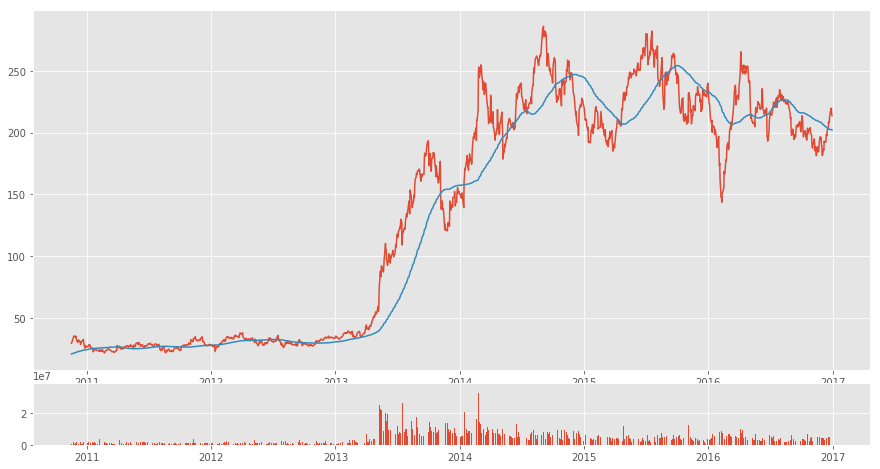

In [30]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1,sharex=ax1)  #sharex is used in subplot graph, so that whn zoomed in one graph, the reference graph also zooms in or move or other operations 

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['MA'])

ax2.bar(df.index,df['Volume'])